In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
def plot_2drp(ax, data, draw_cb=True):

    # plot dens
    var = 'dens'

    # get variable data
    var_data = slug.get_data(data, var)

    # get edge grid
    xi, yi = data.edge_grid()

    # cmap plot
    im = ax.pcolormesh(xi, yi, var_data, cmap='jet', vmin=0.1, vmax=1.8)
    if(draw_cb):
        cb = slug.add_colorbar(im)
        cb.ax.tick_params(labelsize=7)


    # contour plot
    nlevel = 40
    extent = (np.amin(data.x), np.amax(data.x),
              np.amin(data.y), np.amax(data.y))

    levels = np.linspace(0.1, 1.8, nlevel)

    ax.contour(var_data, extent=extent, levels=levels, linewidths=0.2, colors='k')

    ax.set_aspect(aspect=1)

    ax.tick_params(axis='both', which='major', labelsize=7)


In [3]:
weno5_rk3_1600 = slug.load_data2d('./pub_2drp_c3_weno5_rk3_1600_10001.slug')
weno5_rk4_1600 = slug.load_data2d('./pub_2drp_c3_weno5_rk4_1600_10001.slug')

weno5_sf3_1600 = slug.load_data2d('./pub_2drp_c3_weno5_sf3_1600_10001.slug')
weno5_sf4_1600 = slug.load_data2d('./pub_2drp_c3_weno5_sf4_1600_10001.slug')

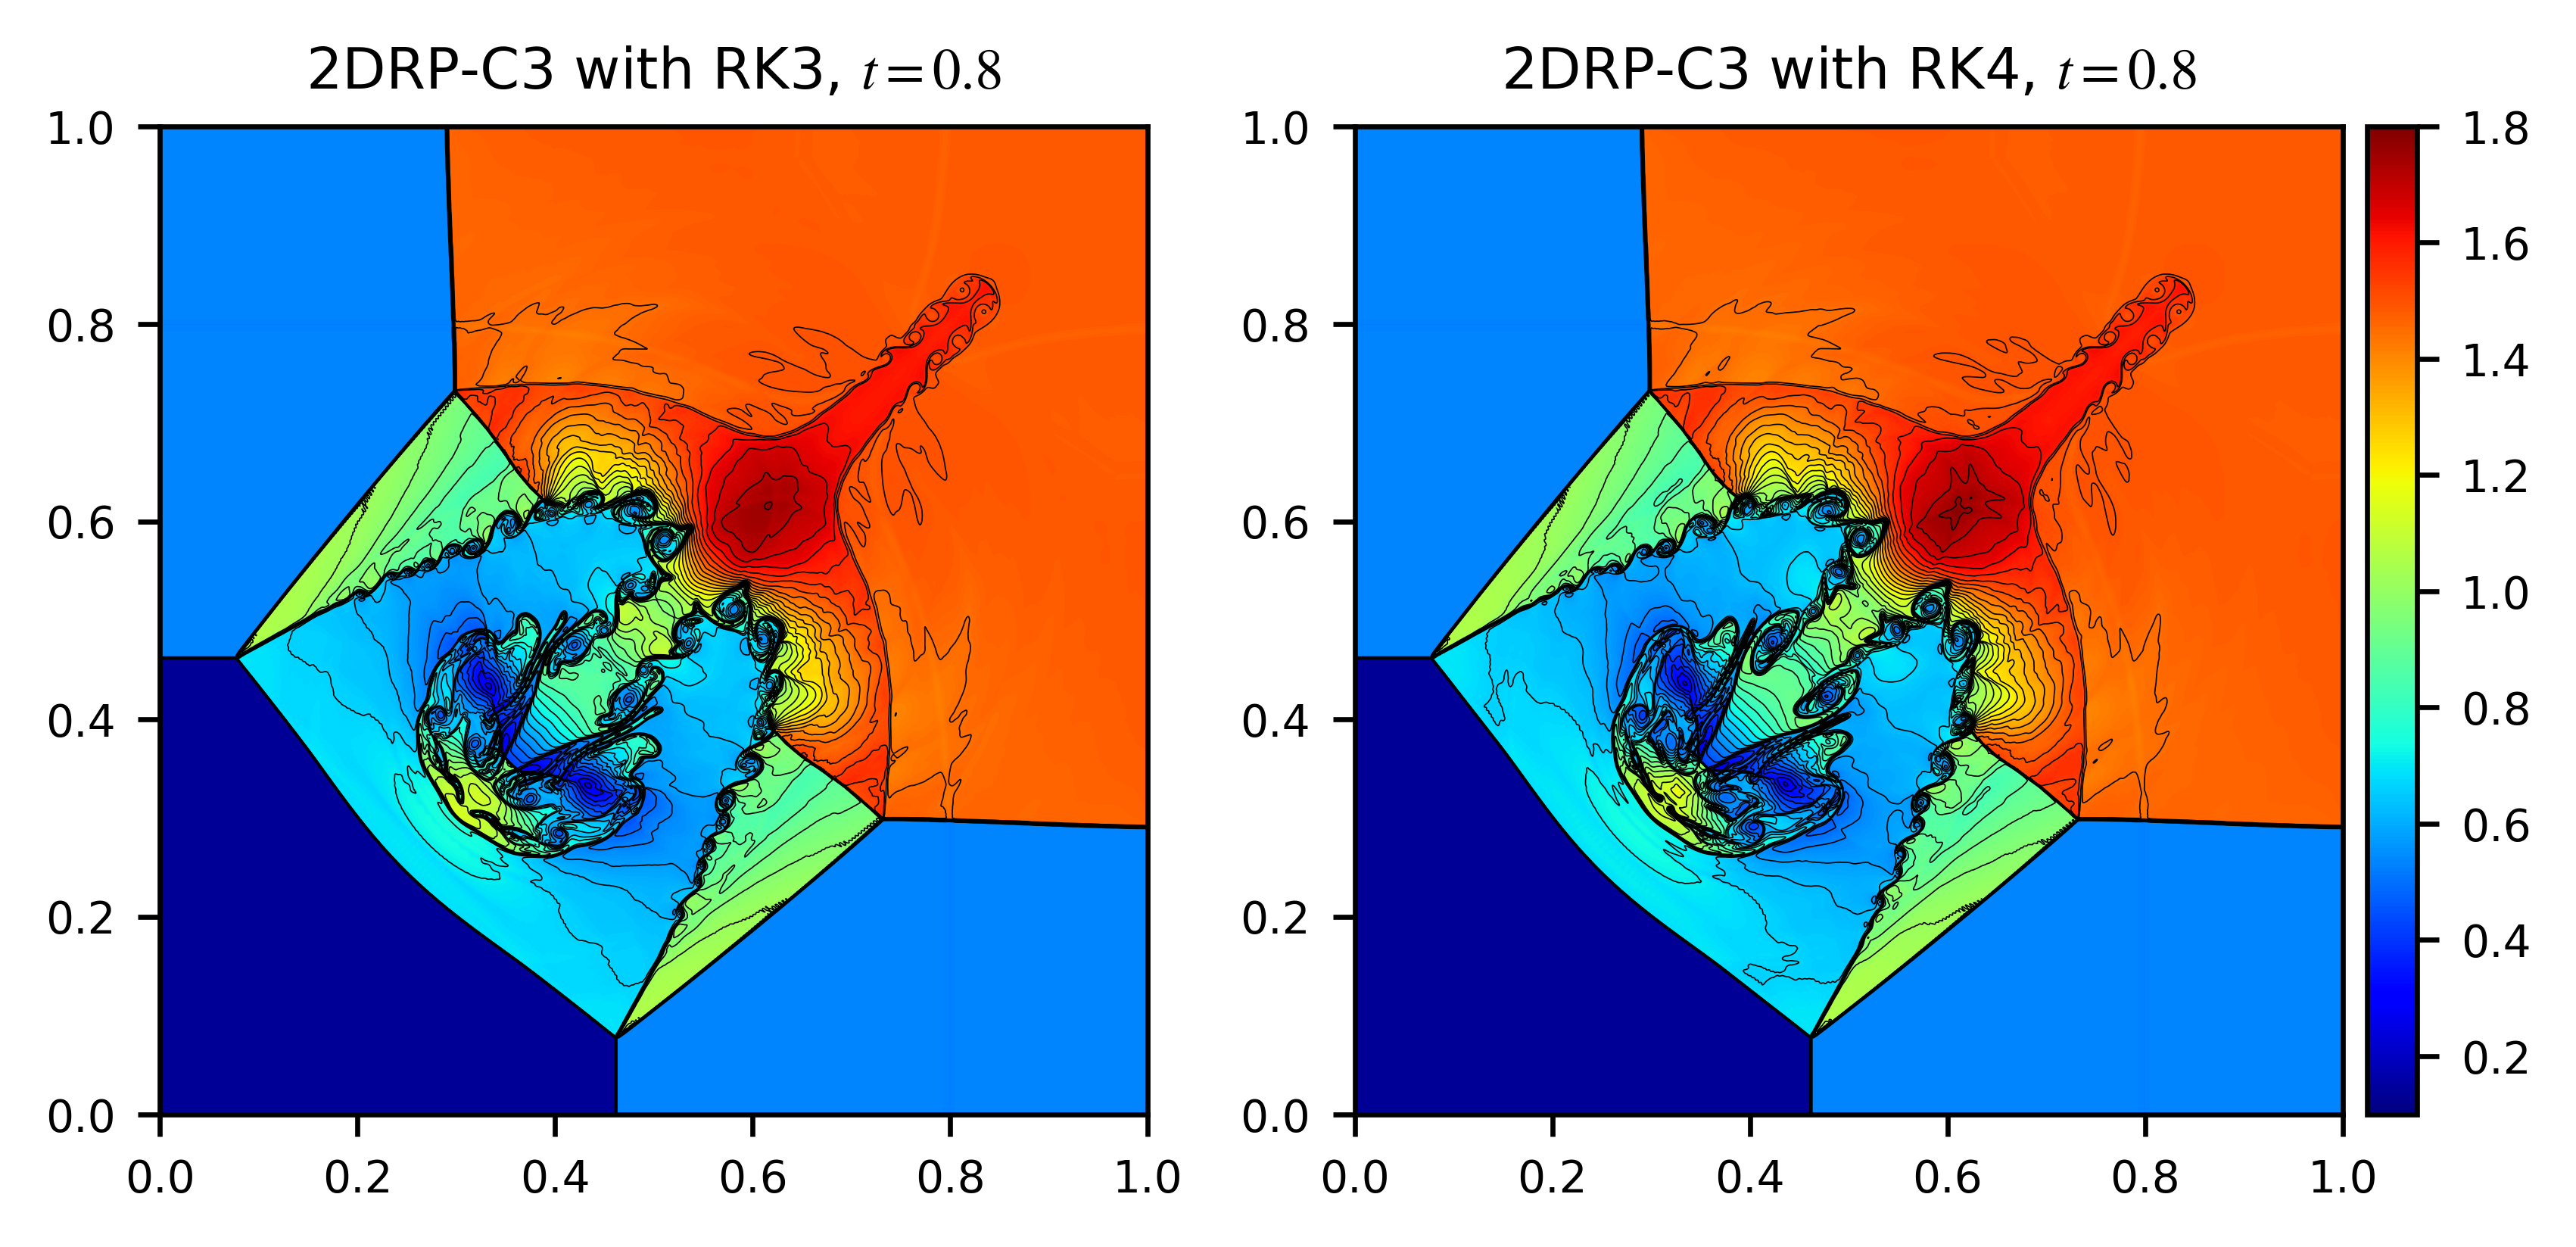

In [4]:
fig = plt.figure(figsize=(7,3), dpi=600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_2drp(ax1, weno5_rk3_1600, draw_cb=False)
plot_2drp(ax2, weno5_rk4_1600)
ax1.set_title('2DRP-C3 with RK3, $t=0.8$', fontsize=9)
ax2.set_title('2DRP-C3 with RK4, $t=0.8$', fontsize=9)

ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

fig.subplots_adjust(hspace=0., wspace=0., top=0.85)
# fig.suptitle('2DRP-C3 (WENO5), $t=0.8$, res=800', fontsize=11)

fig.savefig('./2drp_c3_weno5_rk_1600.png', bbox_inches='tight', pad_inches=0)

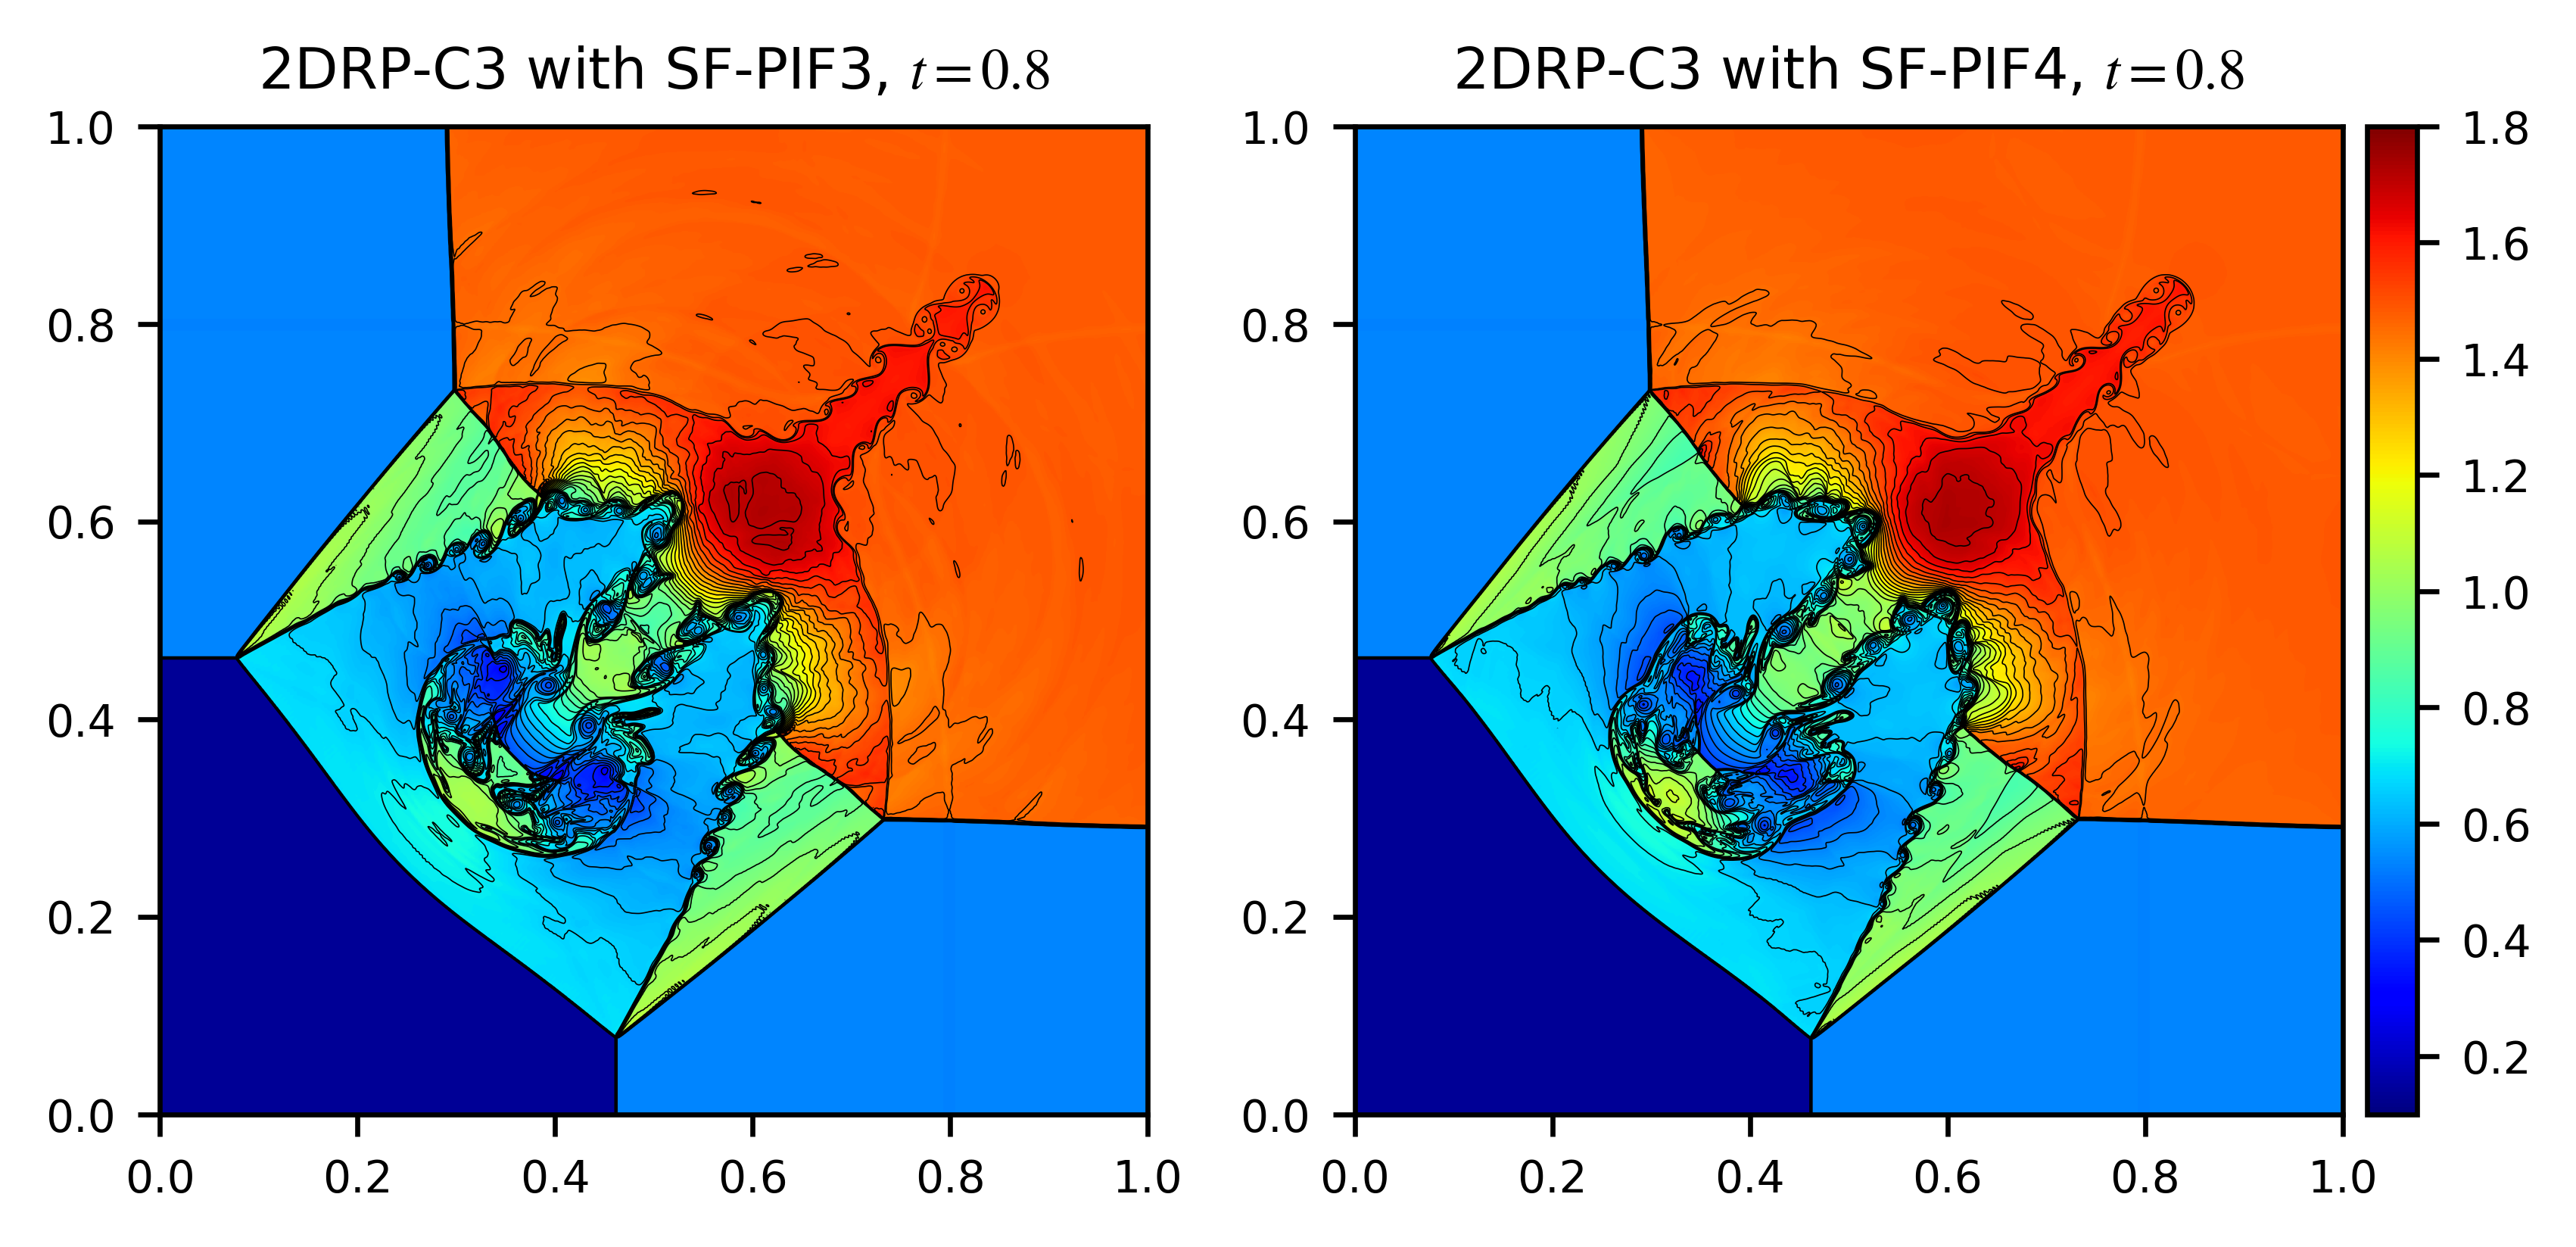

In [5]:
fig = plt.figure(figsize=(7,3), dpi=600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_2drp(ax1, weno5_sf3_1600, draw_cb=False)
plot_2drp(ax2, weno5_sf4_1600)
ax1.set_title('2DRP-C3 with SF-PIF3, $t=0.8$', fontsize=9)
ax2.set_title('2DRP-C3 with SF-PIF4, $t=0.8$', fontsize=9)

ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

fig.subplots_adjust(hspace=0., wspace=0., top=0.85)
# fig.suptitle('2DRP-C3 (WENO5), $t=0.8$, res=800', fontsize=11)

fig.savefig('./2drp_c3_weno5_sfPIF_1600.png', bbox_inches='tight', pad_inches=0)